
<center>

**آزمون عملی درس یادگیری ماشین - ارشد علوم کامپیوتر - دانشگاه الزهرا- خرداد ۱۴۰۴**

**X-Ray توسعه ی سیستم تشخیص بیماری پوکی استخوان زانو با استفاده از تصاویر**

[Knee Osteoarthritis Classification [224*224]](https://github.com/F-Aghaeipoor/Knee-X-ray)
</center>





<div dir="rtl" style="text-align: right;">


**چالش اصلی:** مجموعه داده آموزشی شما  شامل ۲۵۲۰+۱۲۶۰ تصویر برای بیماران مبتلا و سالم می باشد.
برخی تصاویر ممکن است نویز داشته باشند (مانند تغییرات در روشنایی یا کنتراست).
</div>


*   **Normal**: Images of knees with no signs of osteoporosis.

*   **AbNormal** (Osteopenia, Osteoporosis): Images showing early stages of bone density loss and Images indicating advanced bone density degradation.


<div dir="rtl" style="text-align: right;">

**هدف:**
طراحی و پیاده‌سازی  خطوط لوله یادگیری ماشین/عمیق که عملکرد طبقه‌بندی ( با معیار F1-score) را در مجموعه آزمایشی به حداکثر برساند، در حالی که محدودیت داده‌های نامتوازن را مدیریت می‌کند.
</div>


# Section A : Pre-processing


**وظایف:**

۱) تحلیل مقدماتی داده‌ها

۲) پیش‌پردازش و افزایش داده :
یک خط لوله پیش‌پردازش برای **مدیریت نویز و تغییرات** در تصاویر اشعه ایکس (مانند نرمال‌سازی، حذف نویز) توصیف کنید. برای حداقل یک تکنیک پیش‌پردازش (مانند نرمال‌سازی یا فیلتر کردن) توجیه ریاضی ارائه دهید.

حداقل سه تکنیک **افزایش داده** مناسب برای تصاویر اشعه ایکس پیشنهاد دهید تا اندازه مؤثر مجموعه آموزشی افزایش یابد. توضیح دهید چرا هر تکنیک برای این وظیفه پزشکی مناسب است.




##پاسخ
1) برای تکنیک نرمال سازی فرمول ریاضی زیر را داریم که اختلاف داده با میانگی را تقسیم بر انحراف معیار کرده تا تمامی داده ها در ی رنج باشند.

xi = (xi - Mean) / std

2) تکنیک های افزایش داده مانند : چرخش تصاویر تقریبا ده درجه- فلیپ کردن تصاویر- افزایش روشنایی
چرخش نباید بیش از حد باشد زیرا تصاویر غیرواقعی میشود- برای مثال عکس زانوی چپ و راست میتواند فلیپ بشه بدون اینکه معنی تغییر کند- در تصاویر واقعی ممکنه اشعه روشن تر باشد.

In [ ]:
!git clone https://github.com/F-Aghaeipoor/Knee-X-ray.git

Cloning into 'Knee-X-ray'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 31.75 MiB | 8.78 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!ls -l  # Verify you see your data files (e.g., .zip, .rar, or raw folders)

total 4
drwx------ 2 root root 4096 Jun  7 07:41 data


In [ ]:
!sudo apt-get install unrar  # Install unrar first
!unrar x "/content/Knee-X-ray/train.rar" data/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Knee-X-ray/train.rar

Creating    data/train                                                OK
Creating    data/train/AbNormal                                       OK
Extracting  data/train/AbNormal/OP130.jpg                                  0%  OK 
Extracting  data/train/AbNormal/OP130_aug_0.jpeg                           0%  OK 
Extracting  data/train/AbNormal/OP131.jpg                                  0%  OK 
Extracting  data/train/AbNormal/OP131_aug_0.jpeg                           0%  OK 
Extracting  data/train/AbNormal/OP132.jpg                                  0%  OK 
Extracting  data/train/AbNormal/OP132_aug_0.jpeg    

In [ ]:
!unrar x "/content/Knee-X-ray/test.rar" data/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Knee-X-ray/test.rar

Creating    data/test                                                 OK
Creating    data/test/AbNormal                                        OK
Extracting  data/test/AbNormal/OP103_aug_0.jpeg                            0%  OK 
Extracting  data/test/AbNormal/OP104.jpg                                   0%  OK 
Extracting  data/test/AbNormal/OP104_aug_0.jpeg                            0%  OK 
Extracting  data/test/AbNormal/OP105.jpg                                   0%  OK 
Extracting  data/test/AbNormal/OP105_aug_0.jpeg                            0%  OK 
Extracting  data/test/AbNormal/OP106.jpg                                   0%  OK 
Extracting  data/test/AbNormal/OP106_aug_0.jpeg                            0%  OK 
Extracting  data/test/AbNormal/OP107.jpg                                   1%  

In [ ]:
!unrar x "/content/Knee-X-ray/val.rar" data/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Knee-X-ray/val.rar


Would you like to replace the existing file data/val/AbNormal/OP1.JPEG
  5594 bytes, modified on 2025-02-01 13:15
with a new one
  5594 bytes, modified on 2025-02-01 13:15

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit N


Would you like to replace the existing file data/val/AbNormal/OP10.JPEG
  6324 bytes, modified on 2025-02-01 13:15
with a new one
  6324 bytes, modified on 2025-02-01 13:15

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

Program aborted


In [ ]:
import os
import shutil

# Create main data folder
os.makedirs("data", exist_ok=True)

# Create subfolders (train/test/val with Normal/AbNormal)
subfolders = [
    "data/train/Normal",
    "data/train/AbNormal",
    "data/test/Normal",
    "data/test/AbNormal",
    "data/val/Normal",
    "data/val/AbNormal"
]

for folder in subfolders:
    os.makedirs(folder, exist_ok=True)

In [ ]:
!ls data/

test  train  val


In [ ]:
image_count = 0
for folder in subfolders:
    os.makedirs(folder, exist_ok=True)
    print(folder)
    for file in os.listdir(folder):
      if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        image_count += 1
print(f"Total images found: {image_count}")

data/train/Normal
data/train/AbNormal
data/test/Normal
data/test/AbNormal
data/val/Normal
data/val/AbNormal
Total images found: 5400


In [ ]:
import os
import shutil
from glob import glob

# 1. First verify your current structure
print("Current directory:", os.getcwd())
!tree -d  # Show folder structure (install with !apt-get install tree if needed)

# 2. Proper image counting (corrected version)
def count_images(folder):
    return len([f for f in glob(f"{folder}/*") if f.lower().endswith(('.png','.jpg','.jpeg','.bmp'))])

# 3. Print actual counts per category
print("\nActual image counts:")
for split in ['train', 'test', 'val']:
    for class_name in ['Normal', 'AbNormal']:
        path = f"data/{split}/{class_name}"
        print(f"{path}: {count_images(path)} images")


Current directory: /content/drive/MyDrive/Knee-X-ray
/bin/bash: line 1: tree: command not found

Actual image counts:
data/train/Normal: 1260 images
data/train/AbNormal: 2520 images
data/test/Normal: 180 images
data/test/AbNormal: 360 images
data/val/Normal: 360 images
data/val/AbNormal: 720 images


In [ ]:
from PIL import Image
import numpy as np

def validate_images(folder):
    corrupt_files = []
    for img_path in glob(f"{folder}/*"):
        try:
            img = Image.open(img_path)
            img.verify()  # Verify file integrity
            np.array(img)  # Test conversion to array
        except:
            corrupt_files.append(img_path)
    return corrupt_files

print("\nChecking for corrupt images...")
for split in ['train', 'test', 'val']:
    corrupt = validate_images(f"data/{split}/Normal") + validate_images(f"data/{split}/AbNormal")
    print(f"{split} set: {len(corrupt)} corrupt files")


Checking for corrupt images...
train set: 0 corrupt files
test set: 0 corrupt files
val set: 0 corrupt files


In [ ]:
from torchvision import datasets, transforms

# Image transformations
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Create datasets
train_data = datasets.ImageFolder('data/train', transform=transform)
test_data = datasets.ImageFolder('data/test', transform=transform)

print(f"\nTraining classes: {train_data.classes}")
print(f"Training dataset size: {len(train_data)}")
print(f"Test dataset size: {len(test_data)}")


Training classes: ['AbNormal', 'Normal']
Training dataset size: 3780
Test dataset size: 540


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Section B : Models


## وظایف

۱) با استفاده دو مدل از مدل های طبقه بندی یادگیری ماشین سنتی این مجموعه ی داده را آموزش دهید و خطا و دقت داده های تست را تخمین بزنید؟دلیل انتخاب این مدل ها را توضیح دهید.

۲) یک معماری مدل یادگیری عمیق مناسب برای این وظیفه پیشنهاد دهید و خطا و دقت مربوطه را بدست آورید.


 ۳) با توجه به اندازه ی داده ها، با استفاده از یادگیری انتقالی یک مدل از پیش آموزش دیده خاص (مانند ResNet، EfficientNet...)  را پیشنهاد دهید و بر روی داده موجود خطا و دقت مربوطه را بدست آورید.


  **نکته ۱:** با توجه به مجموعه  داده ها استراتژی های لازم (حداقل دو مورد ) برای جلوگیری از بیش برازش مدل استفاده نمایید و تاثیر آنها بر عملکرد مدل را ارزیابی نمایید.


 **نکته ۲:** الگوریتم بهینه‌سازی و هایپرپارامترهای مناسب (مانند نرخ یادگیری، اندازه دسته) باتوجه به زمینه ی مسیله پیشنهادی استفاده نمایید.


##پاسخ
1) مدل های classification برای طبقه
میتوانیم از random forest و مدل logistic reg استفاده کنیم
زیرا جنگل تصادفی روی داده های نامتوازن و تصاویر به خوبی عمل میکند.

2) مدل cnn پیشنهادی

Input (224x224x1) → Conv2D(32, 3x3) → ReLU → BatchNorm → MaxPooling2D
→ Conv2D(64, 3x3) → ReLU → BatchNorm → MaxPooling2D
→ Conv2D(128, 3x3) → ReLU → BatchNorm → MaxPooling2D
→ Flatten → Dense(256) → ReLU → Dropout(0.5) → Dense(1, sigmoid)


3) استفاده از ResNet

In [ ]:
## Classification Logestic Regression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch

# 1. Load and preprocess data
def extract_features(dataset):
    """Convert images to flattened numpy arrays"""
    loader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)
    images, labels = next(iter(loader))
    return images.numpy().reshape(len(dataset), -1), labels.numpy()

# Get features (flattened images)
X_train, y_train = extract_features(train_data)
X_test, y_test = extract_features(test_data)

# 2. Train Logistic Regression
model = LogisticRegression(
    max_iter=1000,  # Increased for convergence
    class_weight='balanced',  # Handles class imbalance
    solver='liblinear',  # Good for binary classification
    random_state=42
)

model.fit(X_train, y_train)

# 3. Evaluate
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=train_data.classes))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")



Classification Report:
              precision    recall  f1-score   support

    AbNormal       0.85      0.81      0.83       360
      Normal       0.65      0.72      0.68       180

    accuracy                           0.78       540
   macro avg       0.75      0.76      0.76       540
weighted avg       0.78      0.78      0.78       540


Accuracy: 0.7778
F1 Score: 0.7802


Classification Report:
              precision    recall  f1-score   support

    AbNormal       0.86      0.91      0.88       360
      Normal       0.79      0.70      0.74       180

    accuracy                           0.84       540
   macro avg       0.83      0.80      0.81       540
weighted avg       0.84      0.84      0.84       540


Accuracy: 0.8389
F1 Score: 0.8362


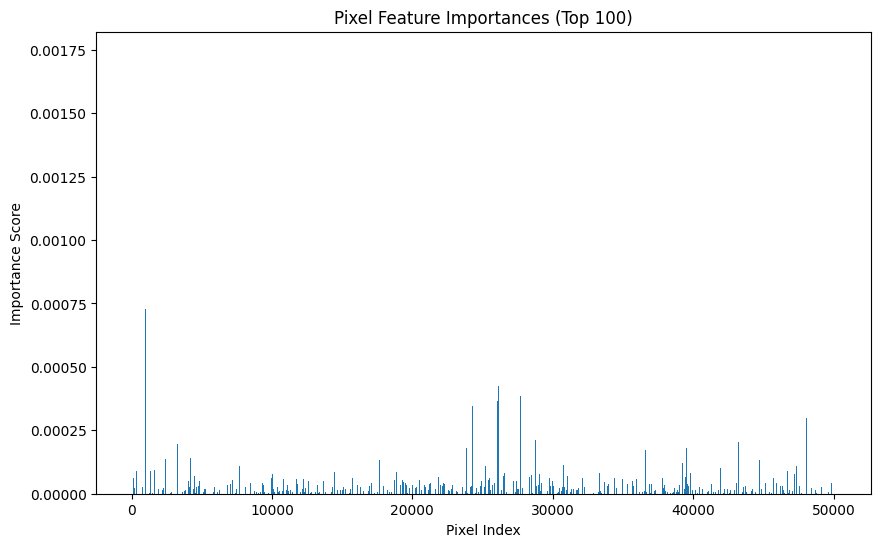

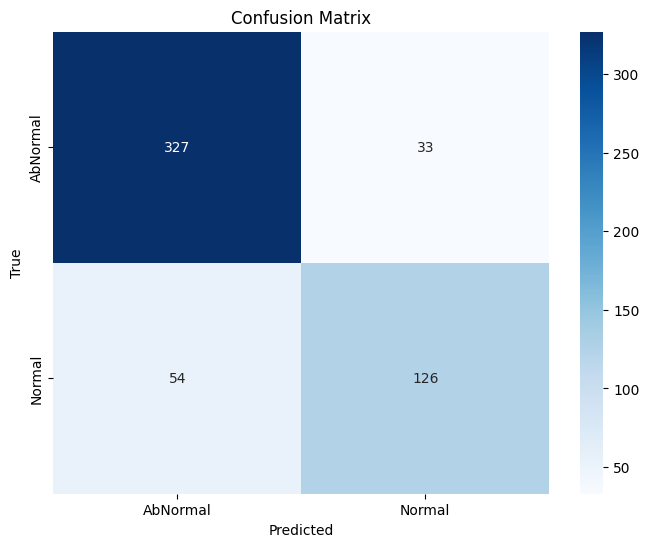

In [ ]:
## Classification Random Forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# 1. Feature Extraction (Flattened Pixels)
def extract_features(dataset):
    loader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)
    images, labels = next(iter(loader))
    return images.numpy().reshape(len(dataset), -1), labels.numpy()

X_train, y_train = extract_features(train_data)
X_test, y_test = extract_features(test_data)

# 2. Initialize Random Forest with Medical Imaging Optimized Parameters
rf = RandomForestClassifier(
    n_estimators=200,          # Increased number of trees
    max_depth=15,              # Limit tree depth
    min_samples_split=5,       # Prevent overfitting
    class_weight='balanced',   # Handle class imbalance
    n_jobs=-1,                # Use all CPU cores
    random_state=42
)

# 3. Train the Model
rf.fit(X_train, y_train)

# 4. Evaluate
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=train_data.classes))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# 6. Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.title("Pixel Feature Importances (Top 100)")
plt.xlabel("Pixel Index")
plt.ylabel("Importance Score")
plt.show()

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Epoch 1/10 - Loss: 0.6818 - Train Acc: 0.6111 - Val Acc: 0.6519
Epoch 2/10 - Loss: 0.6283 - Train Acc: 0.6635 - Val Acc: 0.6648
Epoch 3/10 - Loss: 0.5998 - Train Acc: 0.6788 - Val Acc: 0.6889
Epoch 4/10 - Loss: 0.5782 - Train Acc: 0.7074 - Val Acc: 0.7222
Epoch 5/10 - Loss: 0.5641 - Train Acc: 0.7304 - Val Acc: 0.7333
Epoch 6/10 - Loss: 0.5513 - Train Acc: 0.7368 - Val Acc: 0.7509
Epoch 7/10 - Loss: 0.5464 - Train Acc: 0.7407 - Val Acc: 0.7639
Epoch 8/10 - Loss: 0.5374 - Train Acc: 0.7447 - Val Acc: 0.7556
Epoch 9/10 - Loss: 0.5290 - Train Acc: 0.7532 - Val Acc: 0.7593
Epoch 10/10 - Loss: 0.5281 - Train Acc: 0.7542 - Val Acc: 0.7694

Classification Report:
              precision    recall  f1-score   support

    AbNormal       0.76      0.89      0.82       360
      Normal       0.67      0.44      0.53       180

    accuracy                           0.74       540
   macro avg       0.71      0.67      0.68       540
weighted avg       0.73      0.74      0.72       540



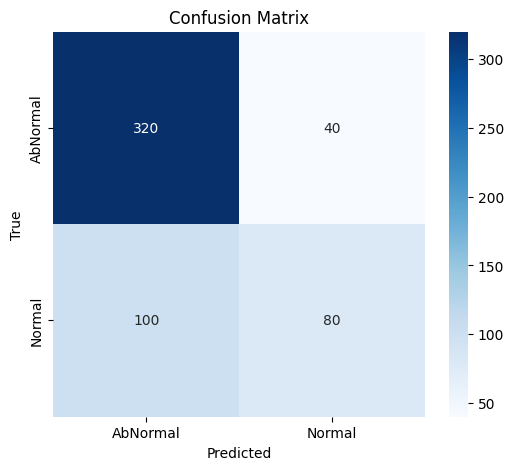

In [ ]:
# === 1. Imports ===
import torch
import torch.nn as nn
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# === 2. Device Setup ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === 3. Transforms ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet mean
        std=[0.229, 0.224, 0.225]    # ImageNet std
    )
])

# === 4. Dataset & Dataloaders ===
train_data = ImageFolder("data/train", transform=transform)
val_data = ImageFolder("data/val", transform=transform)
test_data = ImageFolder("data/test", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# === 5. Load and Modify ResNet ===
resnet = models.resnet18(pretrained=True)

# Freeze base layers
for param in resnet.parameters():
    param.requires_grad = False

# Replace final FC layer
resnet.fc = nn.Sequential(
    nn.Linear(resnet.fc.in_features, 1)
)
resnet = resnet.to(device)

# === 6. Loss and Optimizer ===
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(), lr=1e-4)

# === 7. Evaluation Function ===
def evaluate_model(model, data_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    model.train()
    return correct / total

# === 8. Training Loop ===
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        val_acc = evaluate_model(model, val_loader)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/total:.4f} - Train Acc: {correct/total:.4f} - Val Acc: {val_acc:.4f}")

# === 9. Train the Model ===
train_model(resnet, train_loader, val_loader, criterion, optimizer, epochs=10)

# === 10. Evaluate on Test Set ===
resnet.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = resnet(images)
        preds = torch.sigmoid(outputs) > 0.5
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# === 11. Classification Report ===
print("\nClassification Report:")
print(classification_report(all_labels, np.array(all_preds, dtype=int), target_names=train_data.classes))

# === 12. Confusion Matrix ===
cm = confusion_matrix(all_labels, np.array(all_preds, dtype=int))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
## CNN Model
import torch
import torch.nn as nn
import torch.nn.functional as F

class KneeOsteoCNN(nn.Module):
    def __init__(self):
        super(KneeOsteoCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)  # Adjust if input size changes
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  # No sigmoid
        return x


model = KneeOsteoCNN().to(device)  # <-- move model to GPU or CPU

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


Epoch 1/10, Loss: 0.6566, Train Acc: 0.7122, Val Acc: 0.7435
Epoch 2/10, Loss: 0.4867, Train Acc: 0.7696, Val Acc: 0.7926
Epoch 3/10, Loss: 0.4428, Train Acc: 0.7923, Val Acc: 0.8028
Epoch 4/10, Loss: 0.4044, Train Acc: 0.8180, Val Acc: 0.7509
Epoch 5/10, Loss: 0.3657, Train Acc: 0.8341, Val Acc: 0.8074
Epoch 6/10, Loss: 0.3459, Train Acc: 0.8489, Val Acc: 0.7917
Epoch 7/10, Loss: 0.3040, Train Acc: 0.8643, Val Acc: 0.7278
Epoch 8/10, Loss: 0.2710, Train Acc: 0.8810, Val Acc: 0.8009
Epoch 9/10, Loss: 0.2439, Train Acc: 0.8931, Val Acc: 0.7491
Epoch 10/10, Loss: 0.2132, Train Acc: 0.9119, Val Acc: 0.8157

Classification Report:
              precision    recall  f1-score   support

    AbNormal       0.87      0.91      0.89       360
      Normal       0.81      0.73      0.77       180

    accuracy                           0.85       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.85      0.85      0.85       540

Accuracy: 0.8519
F1 Score (weighted): 

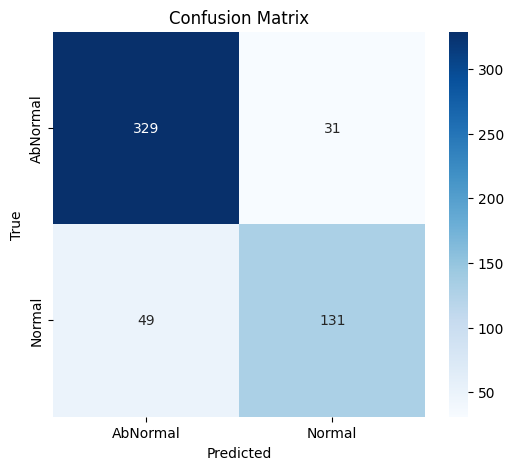

In [ ]:
## ادامه CNN
# === Transforms ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# === Load Data ===
train_data = ImageFolder("data/train", transform=transform)
val_data = ImageFolder("data/val", transform=transform)
test_data = ImageFolder("data/test", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# === Loss and Optimizer ===
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


# === Training Loop ===
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    val_acc = 0
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs) > 0.5
            val_acc += (preds == labels).sum().item()

    val_acc /= len(val_data)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/total:.4f}, Train Acc: {correct/total:.4f}, Val Acc: {val_acc:.4f}")

# === Test Evaluation ===
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device).float().unsqueeze(1)
        outputs = model(images)
        preds = torch.sigmoid(outputs) > 0.5
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# === F1 Score, Accuracy, Report ===
y_true = np.array(all_labels).astype(int)
y_pred = np.array(all_preds).astype(int)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=train_data.classes))

print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"F1 Score (weighted): {f1_score(y_true, y_pred, average='weighted'):.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Section C: Evaluations

## وظایف

نتایج تمامی مدل ها را لیست کرده و ارزیابی از کارایی آنها داشته باشید.

چرا معیار F1-score برای این وظیفه، به‌ویژه با توجه به عدم تعادل احتمالی کلاس‌ها، مناسب است.
چگونه می‌توانیم اطمینان حاصل کنیم که مدل ما در تشخیص پزشکی عادلانه و قابل اعتماد است؟


##پاسخ
. حساسیت به عدم تعادل کلاس‌ها (Class Imbalance):  
   - در داده‌های پزشکی مانند تشخیص پوکی استخوان، معمولاً تعداد نمونه‌های کلاس (AbNormal) کمتر از کلاس (Normal) است.  
   - F1-Score میانگین Precision و Recall است و عملکرد مدل را در هر دو کلاس، مستقل از توزیع نامتوازن داده‌ها، ارزیابی می‌کند.


۲. اهمیت هر دو خطای False Positive و False Negative در پزشکی:  
   - False Negative (FN): تشخیص نادرست بیمار به عنوان سالم → خطر جانی برای بیمار!  
   - False Positive (FP): تشخیص نادرست سالم به عنوان بیمار → هزینه‌های اضافی برای سیستم سلامت.  
   - **F1-Score** هر دو خطا را precision مدیریت می‌کند.  


In [1]:

import pandas as pd

data = {
    'Model': ['ML Model 1(Logistic Reg)', 'ML Model 2(Random Forest)', 'CNN', 'Transfer Learning(ResNet18)'],
    'Precision': [0.78, 0.84, 0.85, 0.73],
    'Recall':    [0.78, 0.84, 0.85, 0.74],
    'Accuracy':  [0.7778, 0.8389, 0.8519, 0.74],
    'F1-score':  [0.7802, 0.8362, 0.8498, 0.72]
}
df = pd.DataFrame(data)

df.head()


,Model,Precision,Recall,Accuracy,F1-score
0,ML Model 1(Logistic Reg),0.78,0.78,0.7778,0.7802
1,ML Model 2(Random Forest),0.84,0.84,0.8389,0.8362
2,CNN,0.85,0.85,0.8519,0.8498
3,Transfer Learning(ResNet18),0.73,0.74,0.7400,0.7200
